In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import pytesseract
import re
import sys

In [2]:
#arg = sys.argv[1]

arg = 'Img1.PNG'

In [3]:
img = cv2.imread(arg)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

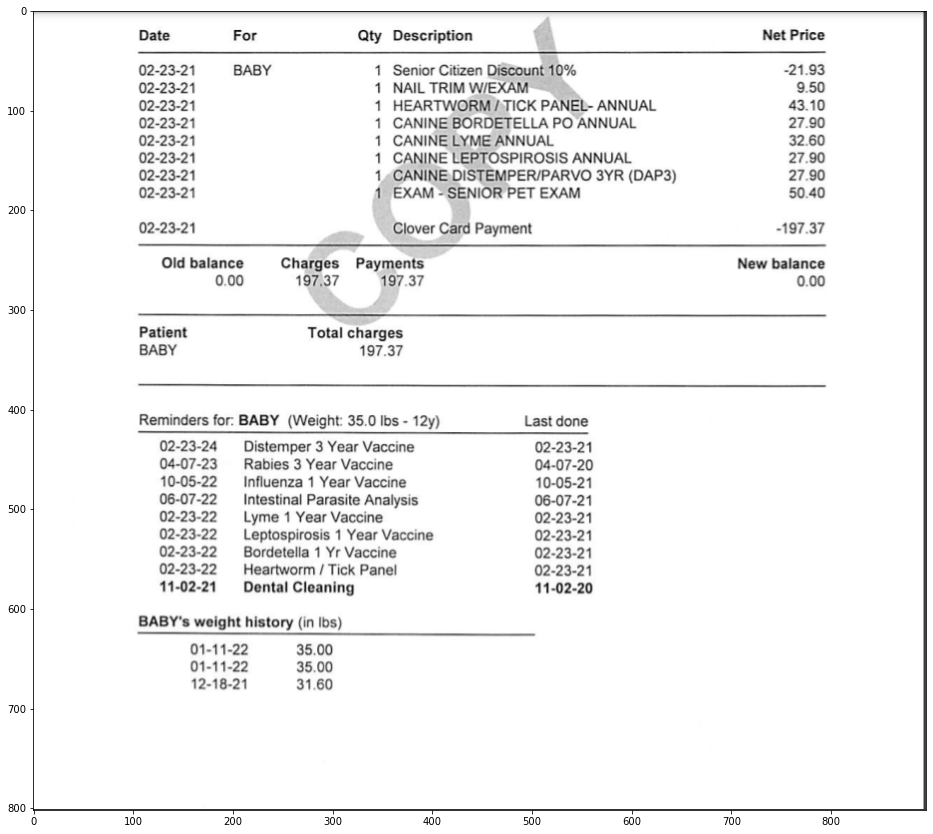

In [4]:
plt.figure(figsize=(16,16))
plt.imshow(gray, cmap="gray")

In [5]:
img.shape

(802, 896, 3)

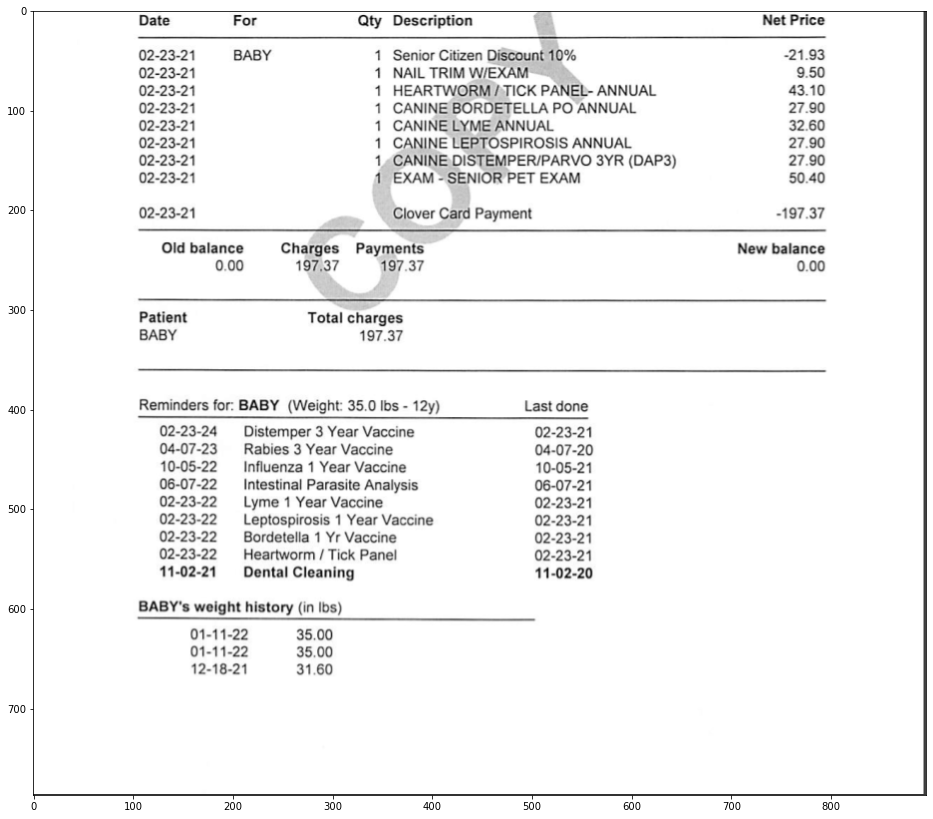

In [6]:
y1 =0
x1=0

h = img.shape[0]
w =img.shape[1] 

img_croped = img[15:y1+h, x1:x1+w]

crop_img_gray = gray[15:y1+h, x1:x1+w]

plt.figure(figsize=(16,16))

plt.imshow(crop_img_gray, cmap="gray")

In [7]:
edges2 = cv2.Sobel(crop_img_gray, dx = 0, dy = 1, ksize = 3, ddepth= int())

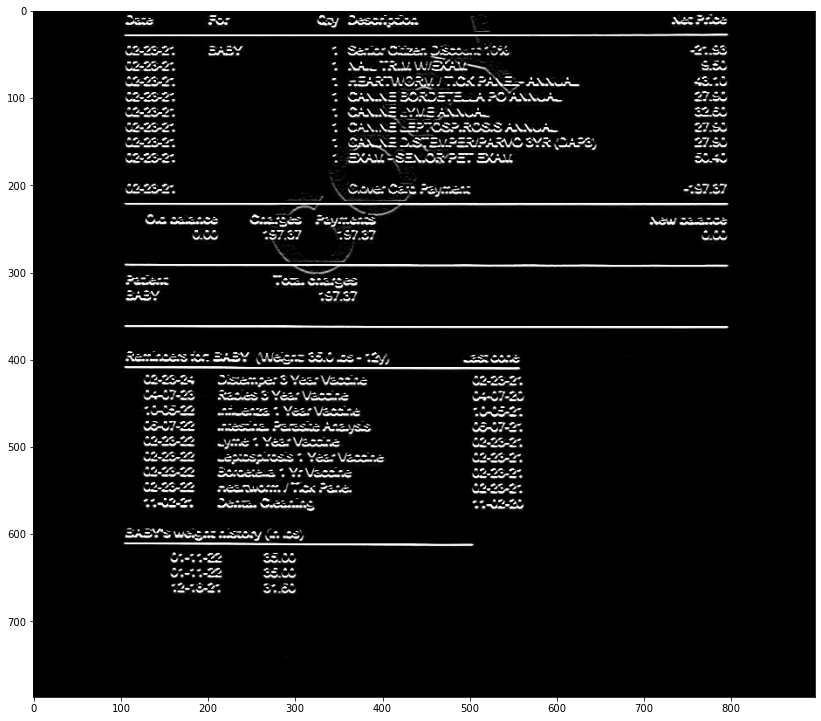

In [8]:
plt.figure(figsize=(14,14))
plt.imshow(edges2, cmap="gray")

In [9]:
lines = cv2.HoughLinesP(image=edges2,rho=10,theta=np.pi/4, threshold=5,lines=np.array([]), minLineLength=400)

a,b,c = lines.shape

for i in range(a):
         
    cv2.line(img_croped , (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), ( 255,0,0), 3, cv2.LINE_AA)

    cv2.imwrite('hough.jpg', img_croped)
    
print(a,b,c)

6 1 4


In [10]:
print(lines)

[[[100 222 798 222]]

 [[100 293 798 293]]

 [[161 364 797 364]]

 [[102  28 797  28]]

 [[100 612 505 612]]

 [[104 410 559 410]]]


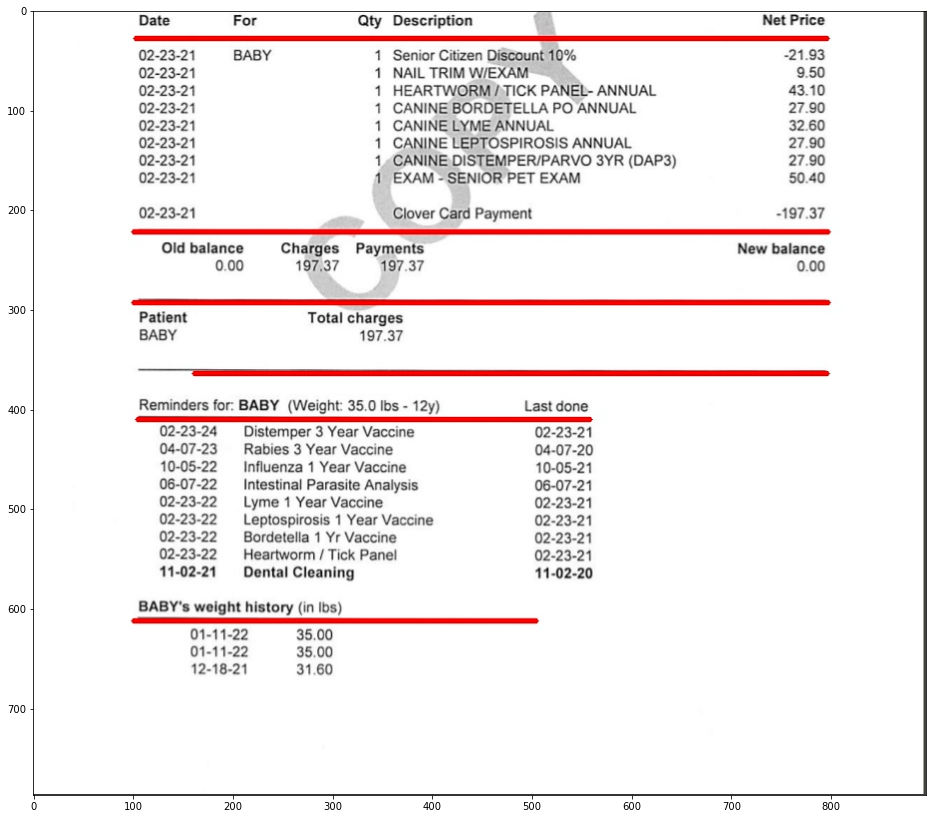

In [11]:
img2 = cv2.imread('hough.jpg')


plt.figure(figsize=(16,16))
plt.imshow(img2)

In [12]:
lines2 =lines.reshape(lines.shape[0],lines.shape[2])

In [13]:
lines2 =lines2[lines2[:, 1].argsort()]

In [14]:
for i in range(len(lines2)):
    if i+1 == lines2.shape[0]:
        break
    else:
        if abs(lines2[i+1][1]-lines2[i][1])<20:
            lines2 =np.delete(lines2, i, axis=0)
            

In [15]:
lines2

array([[102,  28, 797,  28],
       [100, 222, 798, 222],
       [100, 293, 798, 293],
       [161, 364, 797, 364],
       [104, 410, 559, 410],
       [100, 612, 505, 612]], dtype=int32)

In [16]:
height =lines2[1][3] -lines2[0][1] 
print(height)

194


In [17]:
print(x1, w)

0 896


In [18]:
x_crop = x1
y_crop= lines2[0][1]

In [19]:
width = w

print(f"x: {x_crop}, y: {y_crop}, width: {width}, height: {height}")

x: 0, y: 28, width: 896, height: 194


In [20]:
img_before = cv2.imread("hough.jpg")

cropped = img_before[y_crop:y_crop+height, x_crop:width]

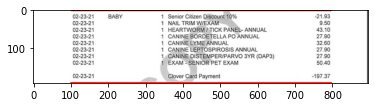

In [21]:
plt.imshow(cropped)

In [22]:
cv2.imwrite('trans.jpg',cropped )

True

In [23]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

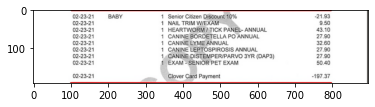

In [24]:
img = cv2.imread('trans.jpg')
plt.imshow(img)

In [25]:
im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

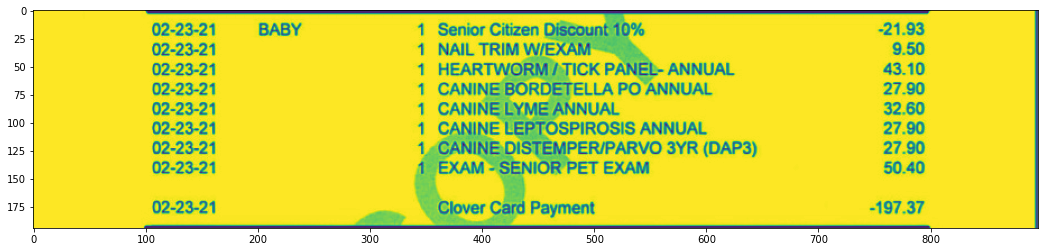

In [26]:
plt.figure(figsize=(20,int(im.shape[1]/im.shape[0])))
plt.imshow(im)
plt.show()

In [27]:
custom_config = r'-l eng --psm 6'
pytesseract.image_to_string(im, config=custom_config)

'02-23-21 BABY 1 Senior Citizen Discount 10% 21.93\n02-23-21 1 NAIL TRIM W/EXAM 9.50\n02-23-21 1 HEARTWORM TICK PANEL- ANNUAL 43.10\n02-23-21 1 CANINE BORDETELLA PO ANNUAL 27.90\n02-23-21 1 CANINE LYME ANNUAL 32.60\n02-23-21 1 CANINE LEPTOSPIROSIS ANNUAL 27.90\n02-23-21 1.CANINE DISTEMPER/PARVO 3YR (DAP3) 27.90\n02-23-21 4 EXAM - SENIOR PET EXAM 50.40\n02-23-21 Clover Card Payment 197.37\n\x0c'

In [28]:
text =pytesseract.image_to_string(im, config=custom_config)

In [29]:
print(text)

02-23-21 BABY 1 Senior Citizen Discount 10% 21.93
02-23-21 1 NAIL TRIM W/EXAM 9.50
02-23-21 1 HEARTWORM TICK PANEL- ANNUAL 43.10
02-23-21 1 CANINE BORDETELLA PO ANNUAL 27.90
02-23-21 1 CANINE LYME ANNUAL 32.60
02-23-21 1 CANINE LEPTOSPIROSIS ANNUAL 27.90
02-23-21 1.CANINE DISTEMPER/PARVO 3YR (DAP3) 27.90
02-23-21 4 EXAM - SENIOR PET EXAM 50.40
02-23-21 Clover Card Payment 197.37



In [30]:
pattern_date =re.compile(r"\d+[/-]\d+[/-]\d+")

matches_date = pattern_date.findall(text)

In [31]:
matches_date

['02-23-21',
 '02-23-21',
 '02-23-21',
 '02-23-21',
 '02-23-21',
 '02-23-21',
 '02-23-21',
 '02-23-21',
 '02-23-21']

In [32]:
pattern_name = re.compile(r"(?<=\d )[A-Za-z]*(?= \d+)")

matches_name = pattern_name.findall(text)

matches_name

['BABY']

In [33]:
type(matches_name)

list

In [34]:
for i in matches_name:
    if i in text:
        text =text.replace(i,"")

In [35]:
text

'02-23-21  1 Senior Citizen Discount 10% 21.93\n02-23-21 1 NAIL TRIM W/EXAM 9.50\n02-23-21 1 HEARTWORM TICK PANEL- ANNUAL 43.10\n02-23-21 1 CANINE BORDETELLA PO ANNUAL 27.90\n02-23-21 1 CANINE LYME ANNUAL 32.60\n02-23-21 1 CANINE LEPTOSPIROSIS ANNUAL 27.90\n02-23-21 1.CANINE DISTEMPER/PARVO 3YR (DAP3) 27.90\n02-23-21 4 EXAM - SENIOR PET EXAM 50.40\n02-23-21 Clover Card Payment 197.37\n\x0c'

In [36]:
for i in matches_date:
    text =text.replace(i,"")

In [37]:
text

'  1 Senior Citizen Discount 10% 21.93\n 1 NAIL TRIM W/EXAM 9.50\n 1 HEARTWORM TICK PANEL- ANNUAL 43.10\n 1 CANINE BORDETELLA PO ANNUAL 27.90\n 1 CANINE LYME ANNUAL 32.60\n 1 CANINE LEPTOSPIROSIS ANNUAL 27.90\n 1.CANINE DISTEMPER/PARVO 3YR (DAP3) 27.90\n 4 EXAM - SENIOR PET EXAM 50.40\n Clover Card Payment 197.37\n\x0c'

In [38]:
pattern_desc =re.compile(r" \D.+? (?=\d+\.\d\d)")

matches_desc =pattern_desc.findall(text)

In [39]:
matches_desc

['  1 Senior Citizen Discount 10% ',
 ' NAIL TRIM W/EXAM ',
 ' HEARTWORM TICK PANEL- ANNUAL ',
 ' CANINE BORDETELLA PO ANNUAL ',
 ' CANINE LYME ANNUAL ',
 ' CANINE LEPTOSPIROSIS ANNUAL ',
 ' DISTEMPER/PARVO 3YR (DAP3) ',
 ' EXAM - SENIOR PET EXAM ',
 ' Clover Card Payment ']

In [40]:
pattern_net =re.compile(r" -?\d+\.\d\d(?= \*\*|\n)")

matches_net =pattern_net.findall(text)

In [41]:
matches_net

[' 21.93',
 ' 9.50',
 ' 43.10',
 ' 27.90',
 ' 32.60',
 ' 27.90',
 ' 27.90',
 ' 50.40',
 ' 197.37']

In [55]:
InvoicePetName= matches_name*len(matches_net)

InvoicePetName

['BABY', 'BABY', 'BABY', 'BABY', 'BABY', 'BABY', 'BABY', 'BABY', 'BABY']

In [48]:
matches_date = [i.replace("-","/") for i in matches_date]

print(matches_date)

['02/23/21', '02/23/21', '02/23/21', '02/23/21', '02/23/21', '02/23/21', '02/23/21', '02/23/21', '02/23/21']


In [49]:
FileName =[arg]
print(FileName)
FileName = FileName*len(matches_date)
print(FileName)

['Img1.PNG']
['Img1.PNG', 'Img1.PNG', 'Img1.PNG', 'Img1.PNG', 'Img1.PNG', 'Img1.PNG', 'Img1.PNG', 'Img1.PNG', 'Img1.PNG']


In [50]:
columns = {"InvoicePetName": InvoicePetName, "TransactionDate": matches_date, "ItemDescription":matches_desc,"NetPrice":matches_net, "FileName":FileName}  

In [51]:
headers =[]
for key, value in columns.items() :
    headers.append(key)
print(headers)

['InvoicePetName', 'TransactionDate', 'ItemDescription', 'NetPrice', 'FileName']


In [52]:
df = pd.DataFrame(columns)

In [53]:
df

,InvoicePetName,TransactionDate,ItemDescription,NetPrice,FileName
0,BABY,02/23/21,1 Senior Citizen Discount 10%,21.93,Img1.PNG
1,BABY,02/23/21,NAIL TRIM W/EXAM,9.50,Img1.PNG
2,BABY,02/23/21,HEARTWORM TICK PANEL- ANNUAL,43.10,Img1.PNG
3,BABY,02/23/21,CANINE BORDETELLA PO ANNUAL,27.90,Img1.PNG
4,BABY,02/23/21,CANINE LYME ANNUAL,32.60,Img1.PNG
5,BABY,02/23/21,CANINE LEPTOSPIROSIS ANNUAL,27.90,Img1.PNG
6,BABY,02/23/21,DISTEMPER/PARVO 3YR (DAP3),27.90,Img1.PNG
7,BABY,02/23/21,EXAM - SENIOR PET EXAM,50.40,Img1.PNG
8,BABY,02/23/21,Clover Card Payment,197.37,Img1.PNG


In [54]:
df.to_csv("output.csv")